In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45

/Users/noahknijff/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


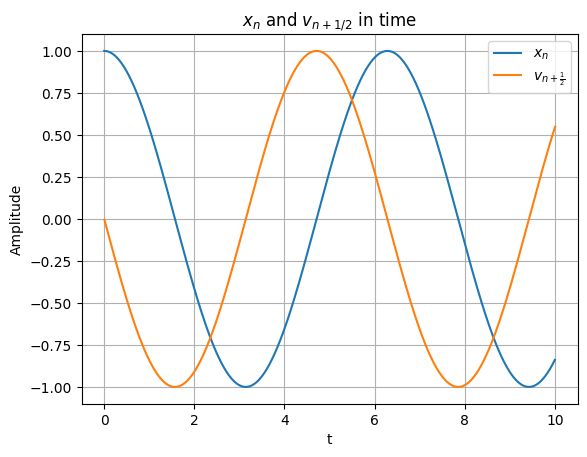

for k = 0.5, period = 11.11 ≈ 3.54 π


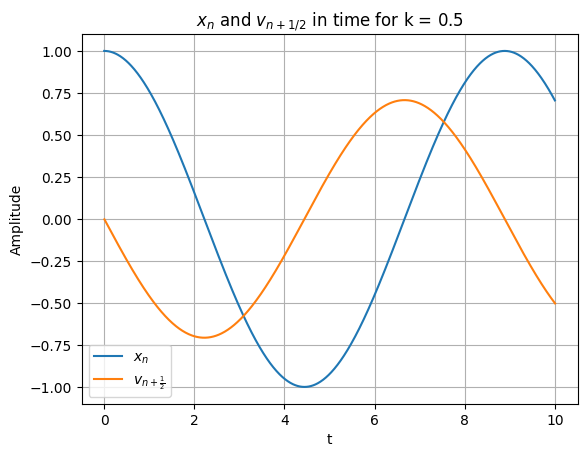

for k = 1, period = 6.28 ≈ 2.00 π


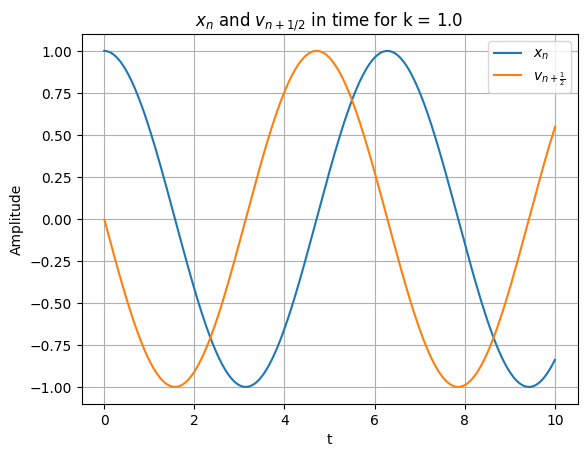

for k = 2, period = 4.4399999999999995 ≈ 1.41 π


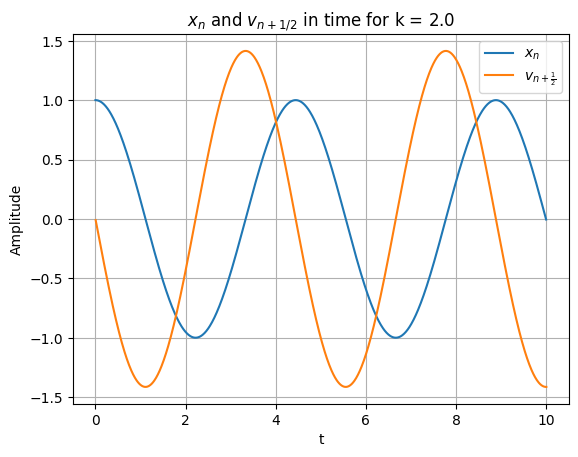

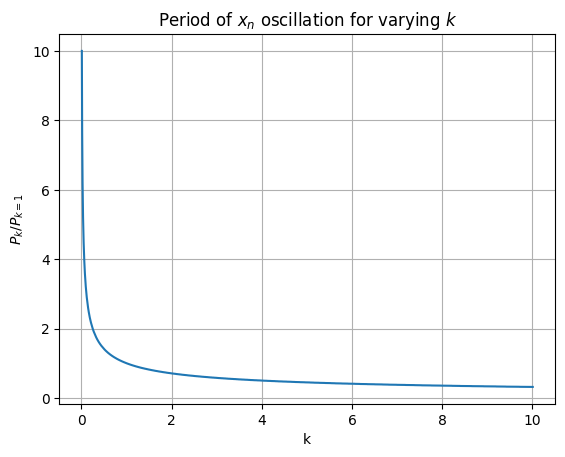

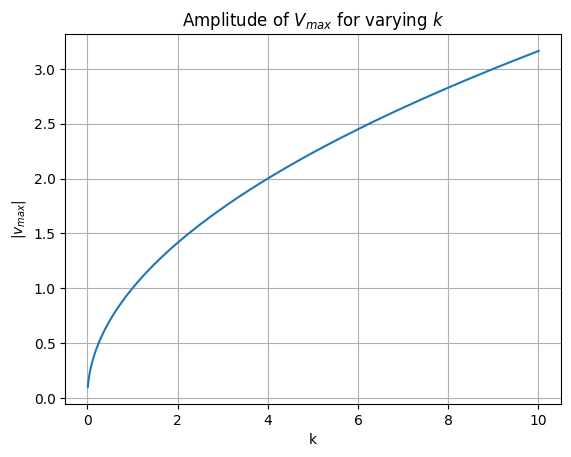

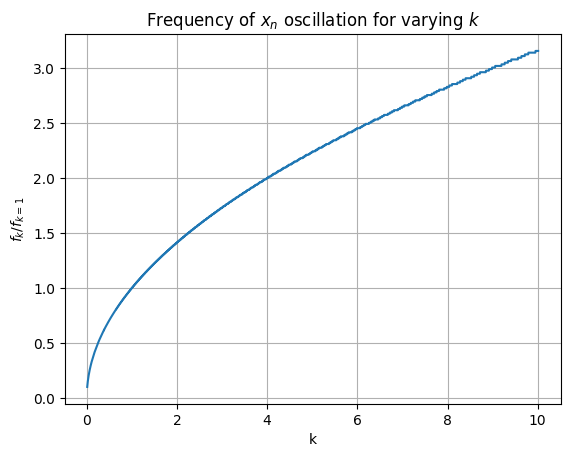

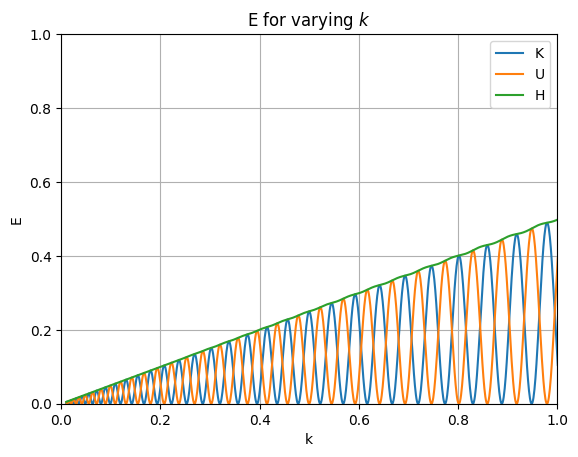

In [2]:
class Leapfrog:
    def __init__(self, m, k, T, dt):
        self.m = m
        self.k = k
        self.T = T
        self.dt = dt
        self.x0 = 1
        self.v0 = -((self.k * self.x0)/self.m) * 0.5 * self.dt
    
    def leap_method(self, energy=False):
        '''
        Leapfrog method with alternating indices x_n and v_n+3/2
        '''
        x = self.x0
        v = self.v0
        x_list = [x]
        v_list = [v]
        t_list = [0]
        
        # initial U from analytical expression
        U = 0.5*self.k*(x**2)
        Uv3_2 = U
        Uv1_2 = U
        Uv3_2_list = [U]
        Uv1_2_list = [U]
        # kinetic energy
        K = 0.5*self.m*(v**2)
        # hamiltionian
        H = K + U
        U_list = [U]
        K_list = [K]
        H_list = [H]
        
        for t in np.arange(self.dt, self.T + self.dt, self.dt):
            # update x over time
            x = x + v * self.dt
            # U integration for v half a step backwards U(n+1) ~ v(n+1/2)
            Uv1_2 = Uv1_2 + (self.k * x/self.m) * v * self.dt            
            
            # update v over time
            v = v - ((self.k * self.dt)/self.m) * x

            # U integration for v half a step forwards U(n+1) ~ v(n+3/2)
            Uv3_2 = Uv3_2 + (self.k * x/self.m) * v * self.dt 
            
            # evaluata K and analytical u for updated x and v
            K = 0.5 * self.m * (v**2)
            U = 0.5* self.k * (x**2)
            
            H = K + U

            x_list.append(x)
            v_list.append(v)
            t_list.append(t)
            
            U_list.append(U)
            K_list.append(K)
            H_list.append(H)
        
            Uv3_2_list.append(Uv3_2)
            Uv1_2_list.append(Uv1_2)
            
        self.K_list = np.array(K_list)
        self.Uv3_2_array = np.array(Uv3_2_list)
        self.Uv1_2_array = np.array(Uv1_2_list)
        self.H_list = np.array(H_list)
        self.U_list = np.array(U_list)
        if energy:
            return H_list
        else:
            self.x_list = x_list
            self.t_list = t_list
            return x_list, v_list, t_list
    
    def period(self):
        '''
        algorithm to find the period of the x-wave
        '''
        x_previous = 1000
        switch_sign = 0
        switch_sign_index = []
        for i, x in enumerate(self.x_list):
            if (x_previous < 0 and x > 0) or (x_previous > 0 and x < 0):
                switch_sign += 1
                switch_sign_index.append(i)
                if switch_sign == 2:
                    period = 2*t_list[switch_sign_index[1]] - t_list[switch_sign_index[0]]
                if switch_sign == 3:
                    period = t_list[switch_sign_index[2]] - t_list[switch_sign_index[0]]
                    break
            x_previous = x
        return period
    
    def standard_period(self):
        '''
        algorithm to find the period of the x-wave for k = 1
        '''
        self.k = 1
        self.leap_method()
        period = self.period()
        return period
    
    def external_force(self, F0, w):
        '''
        leapfrog method with added forcing term with amplitude F0 and frequency w
        '''
        x = self.x0
        v = self.v0
        x_list = [x]
        v_list = [v]
        t_list = [0]
        
        for t in np.arange(self.dt, self.T + self.dt, self.dt):
            x = x + v * self.dt
            v = v - ((self.k * x)/self.m) * self.dt + (F0 * np.sin(w * t) / self.m) * self.dt

            x_list.append(x)
            v_list.append(v)
            t_list.append(t)

        self.x_list = x_list
        self.t_list = t_list
        return x_list, v_list, t_list
    

# initiliaze Leapfrog class, and run leap_method to get data
leap = Leapfrog(m=1, k=1, T=10, dt=0.01)
x_list, v_list, t_list = leap.leap_method()
# t list for v which is bumped by half a timestep
t_1_2_list = np.array(t_list) + 0.5 * leap.dt

# plot for x anf v in time
plt.title(r'$x_{n}$ and $v_{n + 1/2}$ in time')
plt.plot(t_list, x_list, label=r'$x_{n}$')
plt.plot(t_1_2_list, v_list, label=r'$v_{n + \frac{1}{2}}$')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('Downloads/leapfrog_x_v.png', dpi=200)
plt.show()


# plots for x and v, for several given k
k_list = [0.5, 1, 2]  

for k in k_list:
    leap = Leapfrog(m=1, k=k, T=10, dt=0.01)
    x_list, v_list, t_list = leap.leap_method()
    t_1_2_list = np.array(t_list) + 0.5 * leap.dt
    period = leap.period()
    standard_period = leap.standard_period()
    print(f'for k = {k}, period = {period} ≈ %.2f π'%(period/np.pi))
    
    plt.title(r'$x_{n}$ and $v_{n + 1/2}$ in time for k = %.1f'%(k))
    plt.plot(t_list, x_list, label=r'$x_{n}$')
    plt.plot(t_1_2_list, v_list, label=r'$v_{n + \frac{1}{2}}$')
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.savefig(f'Downloads/leapfrog_x_v_k={k}.png', dpi=200)
    plt.show()
  

# Experiments with k
k_list = np.arange(0.01, 10.01, 0.001)
period_list = []
v_max_list = []
standard_period = leap.standard_period()
H_k_list = []
K_k_list = []
U_k_list = []

for k in k_list:
    leap = Leapfrog(m=1, k=k, T=100, dt=0.01)
    x_list, v_list, t_list = leap.leap_method()
    t_1_2_list = np.array(t_list) + 0.5 * leap.dt
    v_amplitude = max(v_list)
    v_max_list.append(v_amplitude)
    period = leap.period()
    period_list.append(period)
    H_k = leap.H_list[-1]
    K_k = leap.K_list[-1]
    U_k = leap.U_list[-1]
    
    H_k_list.append(H_k)
    K_k_list.append(K_k)
    U_k_list.append(U_k)

# plot for period of x against k
plt.title(r'Period of $x_{n}$ oscillation for varying $k$')
plt.plot(k_list, np.array(period_list)/standard_period)
plt.grid(True)
plt.ylabel(r'$P_{k}/P_{k=1}$')
plt.xlabel('k')
plt.savefig('Downloads/leapfrog_period_k.png', dpi=200)
plt.show()


# plot for v amplitude against k
plt.title('Amplitude of $V_{max}$ for varying $k$')
plt.plot(k_list, v_max_list)
plt.grid(True)
plt.ylabel(r'$|v_{max}|$')
plt.xlabel('k')
plt.savefig('Downloads/leapfrog_vmax_k.png', dpi=200)
plt.show()


# plot for frequency of oscillation against k
natural_frequency = 2*np.pi/standard_period
frequency = 2*np.pi/np.array(period_list)

plt.title(r'Frequency of $x_{n}$ oscillation for varying $k$')
plt.plot(k_list, frequency/natural_frequency)
plt.grid(True)
plt.ylabel(r'$f_{k}/f_{k=1}$')
plt.xlabel('k')
# plt.savefig('leapfrog_frequency_k.png', dpi=200)
plt.show()


# plot for Energies against k
plt.title('E for varying $k$')
plt.plot(k_list, K_k_list, label='K')
plt.plot(k_list, U_k_list, label='U')
plt.plot(k_list, H_k_list, label='H')
plt.grid(True)
plt.ylabel('E')
plt.xlabel('k')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
# plt.savefig('Downloads/leapfrog_E_k.png', dpi=200)
plt.show()




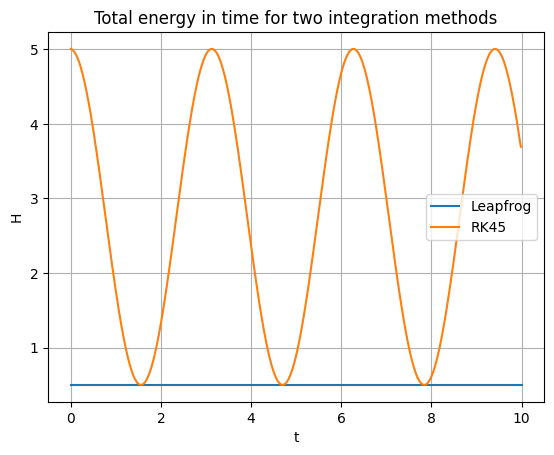

Period = 3.139999999999943 ≈ 1.00 π
minimum at t = 1.570
minimum at t = 4.710
minimum at t = 7.850
Amplitude H = 3.2523321543591908


In [3]:
class Integrate_rk45:
    def __init__(self, m, k, T, dt):
        self.m = m
        self.k = k
        self.T = T
        self.dt = dt
        self.x0 = 1
        self.v0 = -((self.k * self.x0)/self.m) * 0.5 * self.dt
        
    def hamiltonian(self, t, y):
        '''
        hamiltonian evaluated at each step of integration
        '''
        x = y[0]
        v = y[1]
        dxdt = v
        dvdt = -self.k*x/self.m
        return [dxdt, dvdt]
    
    def integrate(self):
        '''
        RK45 integration, and evaluation of hamiltonian at every time (integration) step
        '''
        # Set up integrator
        integrator = RK45(lambda t, y: self.hamiltonian(t=t, y=y), t0=self.dt, y0=[self.x0, self.v0], t_bound=self.T, max_step=self.dt)

        # Initialize arrays for time, position, velocity, and Hamiltonian
        t_array = [0]
        x_array = [self.x0]
        v_array = [self.v0]
        H_array = []

        # Integrate Hamilton's equations
        while integrator.status == 'running':
            integrator.step()
            t_array.append(integrator.t)
            x_array.append(integrator.y[0])
            v_array.append(integrator.y[1])
            H_array.append(0.5*integrator.y[1]**2 + 0.5*k*integrator.y[0]**2)
    
        self.H_array = H_array
        self.t_array = t_array
        return H_array
    
    def period(self):
        '''
        algorithm to find the period of the x-wave
        '''        
        H_previous = 1000
        minima = 0
        minima_index = []
        H_min = min(self.H_array)
        for i, H in enumerate(self.H_array):
            if round(H,4) == round(H_min,4):
                minima += 1
                minima_index.append(i)
                if minima == 2:
                    period = self.t_array[minima_index[1]] - self.t_array[minima_index[0]]
                    break
            H_previous = H     
        return period

# initialize leapfrog anf rk45 classes
leap = Leapfrog(m=1, k=1, T=10, dt=0.01)
rk45 = Integrate_rk45(m=1, k=1, T=10, dt=0.01)

H_leapfrog = leap.leap_method(energy=True)
H_rk45 = rk45.integrate()
leap.leap_method()

# Plot for total energy in time for both integration methods
plt.title('Total energy in time for two integration methods')
plt.plot(np.array(range(len(H_leapfrog)))*leap.dt, 0.5*(leap.Uv1_2_array + leap.Uv3_2_array)  + leap.K_list, label='Leapfrog')
plt.plot(np.array(range(len(H_rk45)))*rk45.dt, H_rk45, label='RK45')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('H')
plt.legend()
plt.savefig('Downloads/leapfrog_rk45')
plt.show()


# find when rk45 equals the leapfrog constant Hamiltonian
period = rk45.period()
print(f'Period = {period} ≈ %.2f π'% (period/np.pi))
for i in range(3):
    t_minimum = 0.5*period + i*period
    print('minimum at t = %.3f' %(t_minimum))


print('Amplitude H =', min(H_rk45) + (min(H_rk45) + max(H_rk45))/2)

w_nat = 1.0005072145190423
freq = 0.6 w_nat
freq = 0.6003043287114254


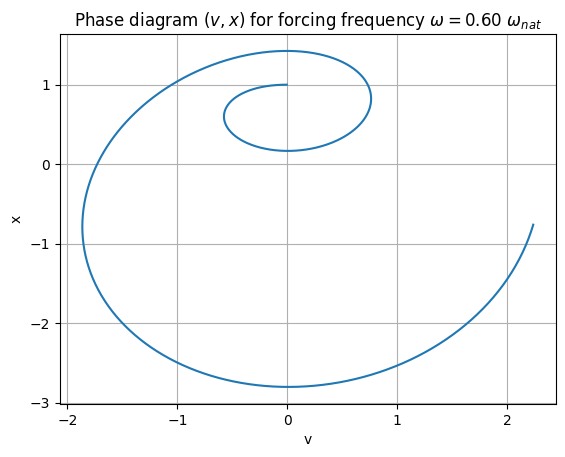

freq = 1 w_nat
freq = 1.0005072145190423


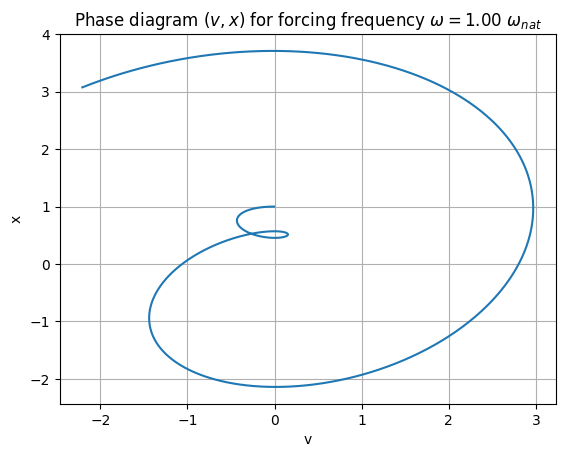

In [4]:
# Phase diagrams for (v,x) for varying omega

leap = Leapfrog(m=1, k=1, T=10, dt=0.01)
standard_period = leap.standard_period()
natural_frequency = 2*np.pi/standard_period
print('w_nat =', natural_frequency)

# omega_list = [0.5, 0.6, 0.75, 1, 1.25]
omega_list = [0.6, 1]

for factor in omega_list:
    x_list, v_list, t_list = leap.external_force(F0=1, w=factor*natural_frequency)
    print(f'freq = {factor} w_nat')
    print('freq =', factor*natural_frequency)
    plt.title(r'Phase diagram $(v,x)$ for forcing frequency $\omega = %.2f\ \omega_{nat}$'%(factor))
    plt.plot(v_list, x_list, label=r'$\omega= %.2f$ \omega_{nat}'%(factor))
    plt.grid(True)
    plt.xlabel('v')
    plt.ylabel('x')
    plt.savefig(f'Downloads/leapfrog_phase_omega={factor}.png',dpi=200)
    plt.show()


